In [ ]:
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
plt.style.use("default")

data_directory = "."

In [ ]:
hypercube_data = read_csv(f"{data_directory}/HYPERCUBE_DATA.csv", header=0).to_dict()
flattened_butterfly_data = read_csv(f"{data_directory}/FLATTENED_BUTTERFLY_DATA.csv", header=0).to_dict()

In [ ]:
data_headers = ["Nodes", 
                "Traffic", 
                "Network Load", 
                "Cycles Simulated", 
                "End Simulation", 
                "Send Packets", 
                "Received Packets", 
                "Achieved Throughput", 
                "Average Latency", 
                "Router Traversals", 
                "Avg Router Traversals", 
                "Link Traversals", 
                "Avg Network Hop Count", 
                "OPort Link", 
                "Simulation Runtime"]

load_args = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
loads = len(load_args)
traffic_labels = ["Uniform", "Complement", "Tornado"]
traffic_args = np.array([0, 4, 8])
traffics = len(traffic_args)
K_args = (2 ** np.array([4, 6, 8, 10]))
Ks = len(K_args)

per_core_sims = loads * traffics
print(f"{per_core_sims} simulations done per core count")

In [ ]:
# just a sanity check

count_dict = {}
for i, node in hypercube_data["Nodes"].items():
    if node not in count_dict.keys():
        count_dict[node] = 1
    else:
        count_dict[node] += 1

count_dict, np.sum(list(count_dict.values()))

In [ ]:
# plot per KxK per topology for latency and throughput against different network loads
hypercube_16x16_latency_0        = []
hypercube_16x16_latency_4        = []
hypercube_16x16_latency_8        = []
hypercube_16x16_throughput_0     = []
hypercube_16x16_throughput_4     = []
hypercube_16x16_throughput_8     = []
hypercube_64x64_latency_0        = []
hypercube_64x64_latency_4        = []
hypercube_64x64_latency_8        = []
hypercube_64x64_throughput_0     = []
hypercube_64x64_throughput_4     = []
hypercube_64x64_throughput_8     = []
hypercube_256x256_latency_0      = []
hypercube_256x256_latency_4      = []
hypercube_256x256_latency_8      = []
hypercube_256x256_throughput_0   = []
hypercube_256x256_throughput_4   = []
hypercube_256x256_throughput_8   = []
hypercube_1024x1024_latency_0    = []
hypercube_1024x1024_latency_4    = []
hypercube_1024x1024_latency_8    = []
hypercube_1024x1024_throughput_0 = []
hypercube_1024x1024_throughput_4 = []
hypercube_1024x1024_throughput_8 = []

i = 0
for K in K_args:
    print(f"hypercube_{K}x{K}")
    for traffic in traffic_args:
        for load_i, load in enumerate(load_args):
            # print(f"i = {i}:  \t K = {K}, traffic = {traffic}, load = {load}")
            
            eval(f"hypercube_{K}x{K}_latency_{traffic}.append(hypercube_data[\"Average Latency\"][{i}])")
            eval(f"hypercube_{K}x{K}_throughput_{traffic}.append(hypercube_data[\"Achieved Throughput\"][{i}])")
            
            i += 1

In [80]:
# plot per KxK per topology for latency and throughput against different network loads
flattened_butterfly_16x16_latency_0        = []
flattened_butterfly_16x16_latency_4        = []
flattened_butterfly_16x16_latency_8        = []
flattened_butterfly_16x16_throughput_0     = []
flattened_butterfly_16x16_throughput_4     = []
flattened_butterfly_16x16_throughput_8     = []
flattened_butterfly_64x64_latency_0        = []
flattened_butterfly_64x64_latency_4        = []
flattened_butterfly_64x64_latency_8        = []
flattened_butterfly_64x64_throughput_0     = []
flattened_butterfly_64x64_throughput_4     = []
flattened_butterfly_64x64_throughput_8     = []
flattened_butterfly_256x256_latency_0      = []
flattened_butterfly_256x256_latency_4      = []
flattened_butterfly_256x256_latency_8      = []
flattened_butterfly_256x256_throughput_0   = []
flattened_butterfly_256x256_throughput_4   = []
flattened_butterfly_256x256_throughput_8   = []
flattened_butterfly_1024x1024_latency_0    = []
flattened_butterfly_1024x1024_latency_4    = []
flattened_butterfly_1024x1024_latency_8    = []
flattened_butterfly_1024x1024_throughput_0 = []
flattened_butterfly_1024x1024_throughput_4 = []
flattened_butterfly_1024x1024_throughput_8 = []

i = 0
for K in K_args:
    print(f"flattened_butterfly_{K}x{K}")
    for traffic in traffic_args:
        for load_i, load in enumerate(load_args):
            # print(f"i = {i}:  \t K = {K}, traffic = {traffic}, load = {load}")
            
            eval(f"flattened_butterfly_{K}x{K}_latency_{traffic}.append(hypercube_data[\"Average Latency\"][{i}])")
            eval(f"flattened_butterfly_{K}x{K}_throughput_{traffic}.append(hypercube_data[\"Achieved Throughput\"][{i}])")
            
            i += 1

flattened_butterfly_16x16
flattened_butterfly_64x64
flattened_butterfly_256x256
flattened_butterfly_1024x1024


## Plotting

In [ ]:
markers = ["o", "*", "^", "d"]

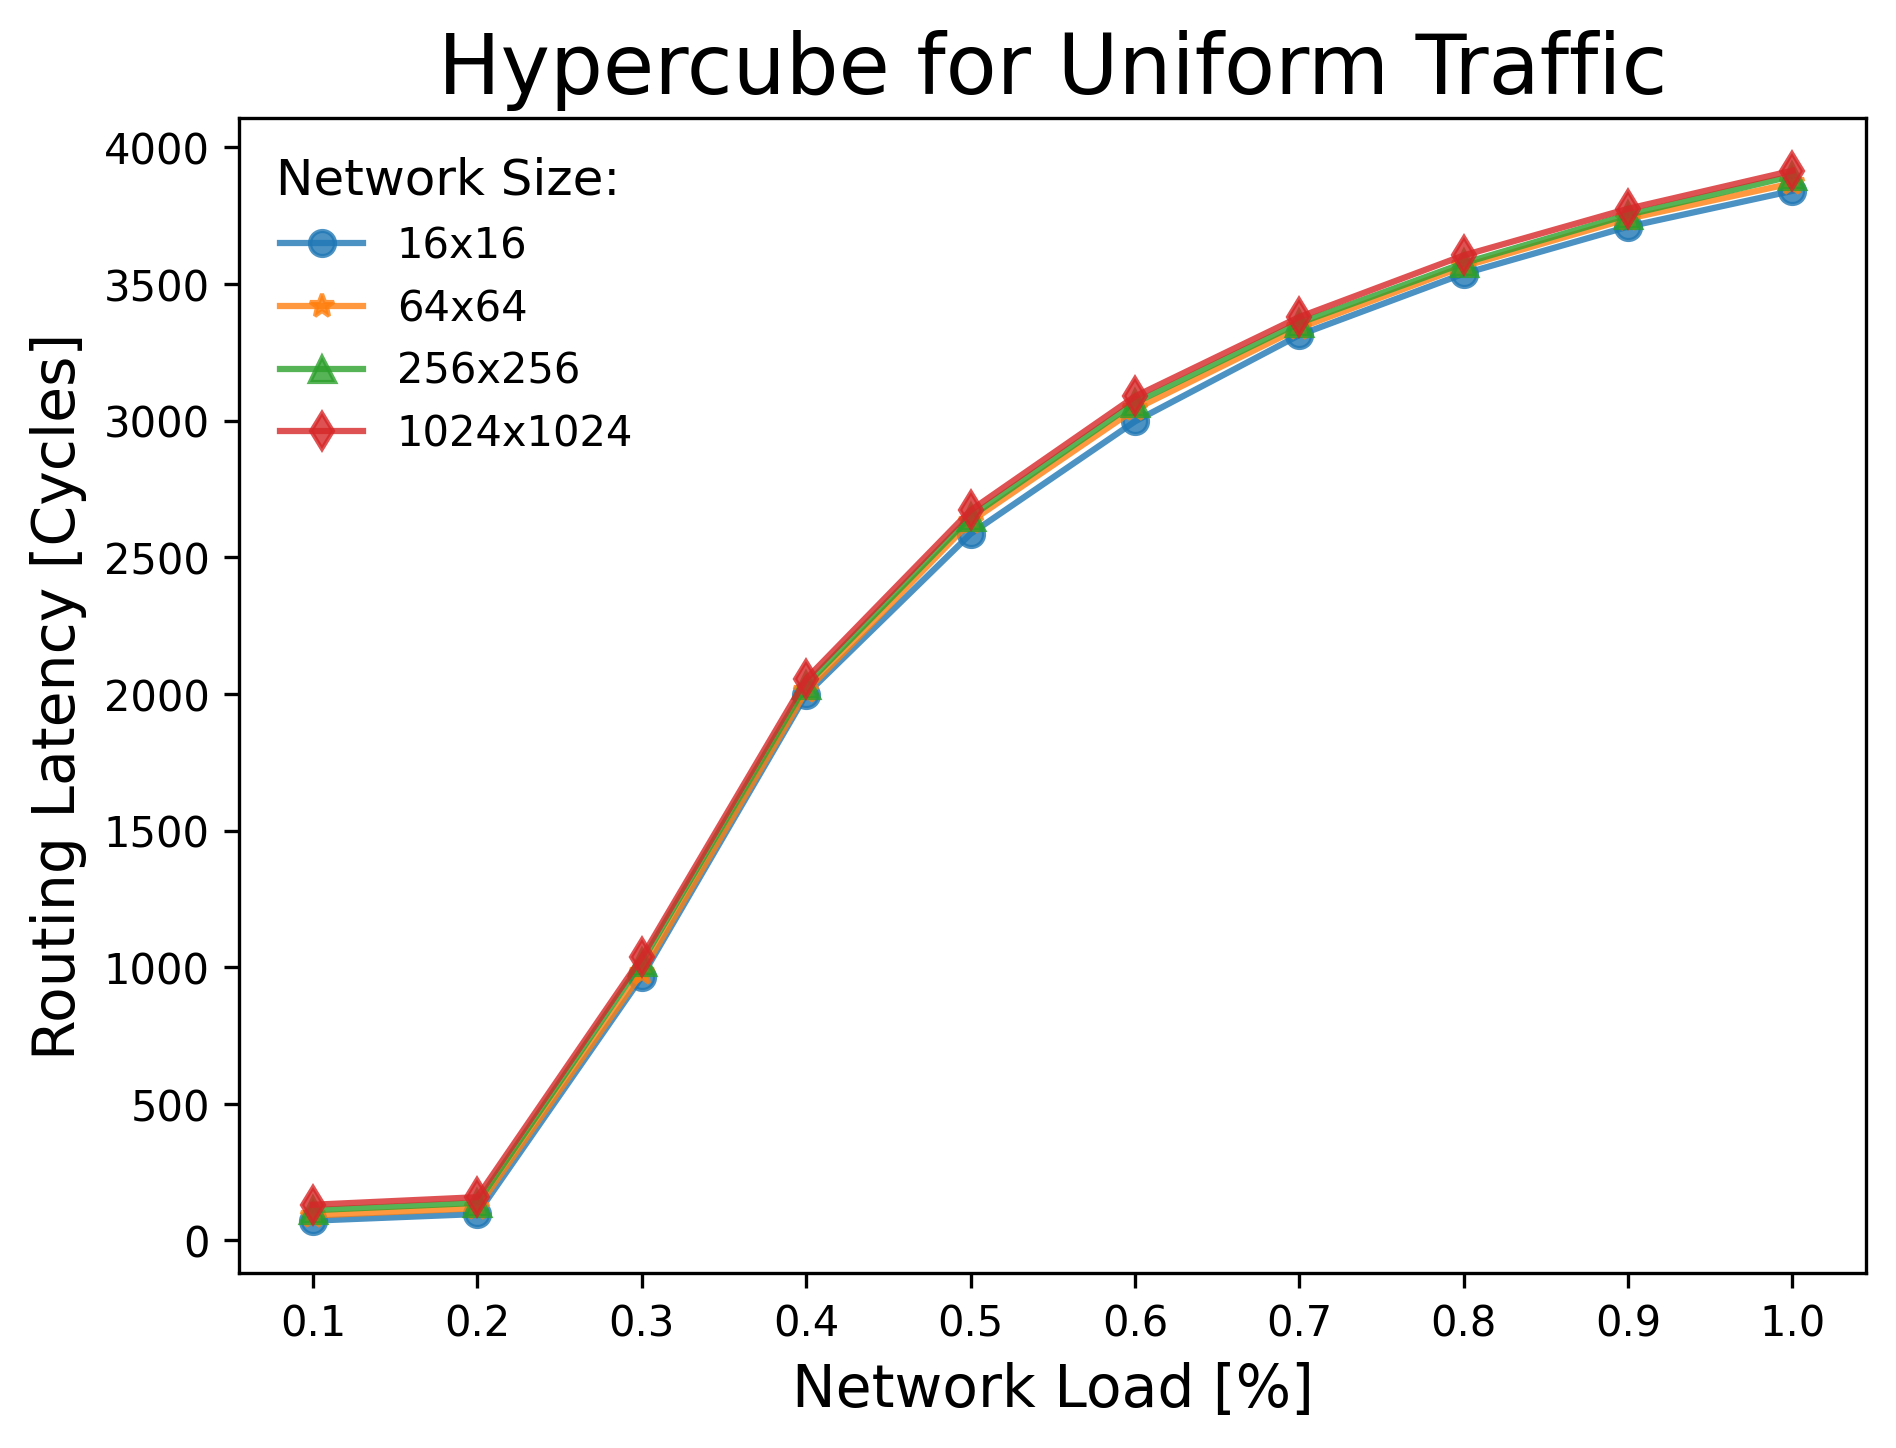

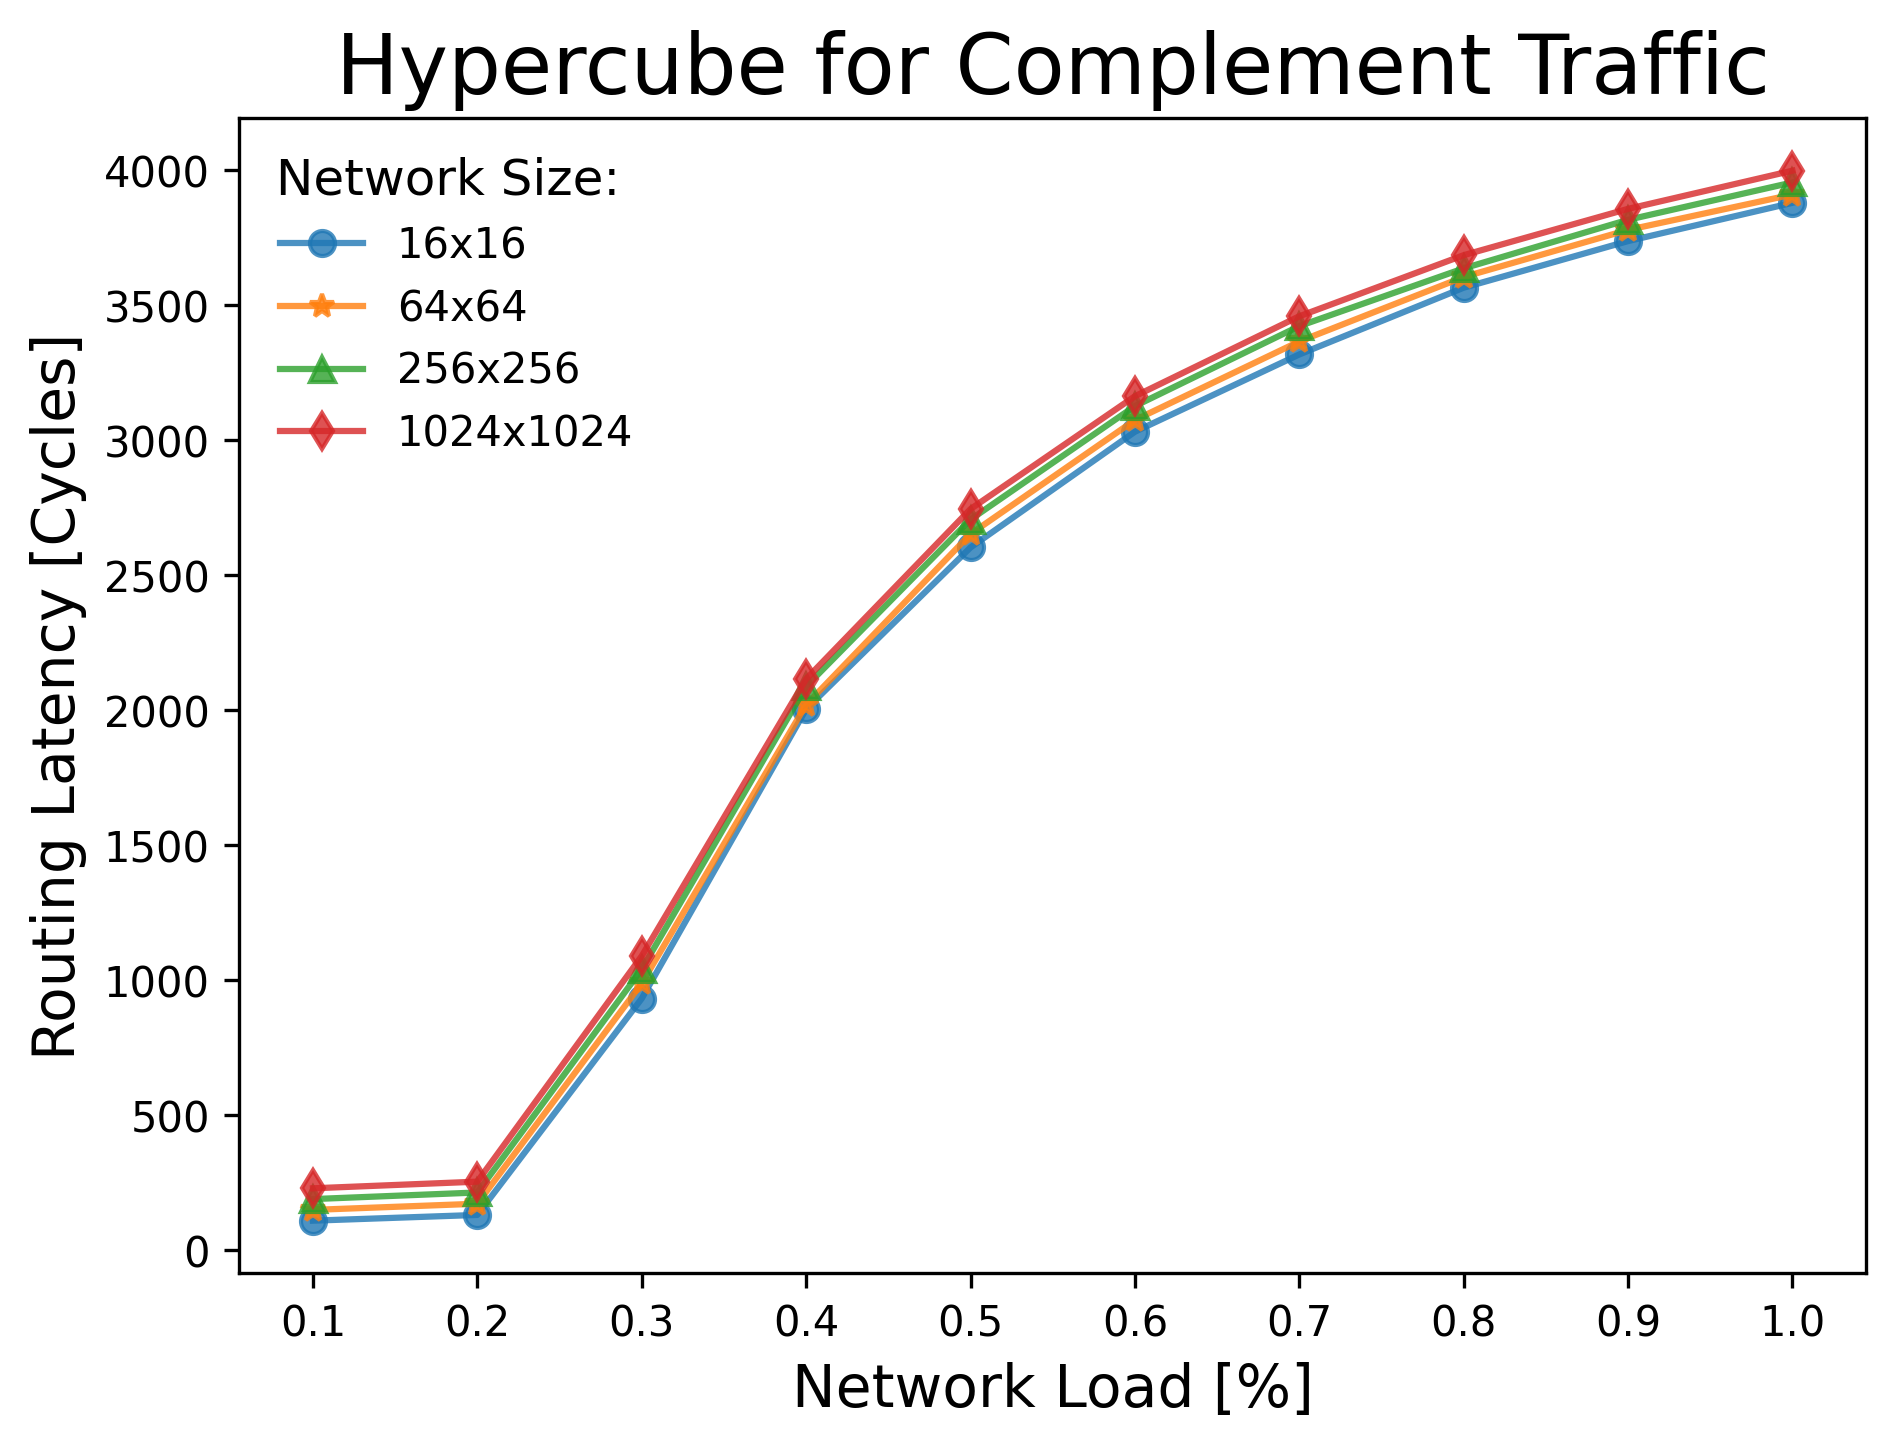

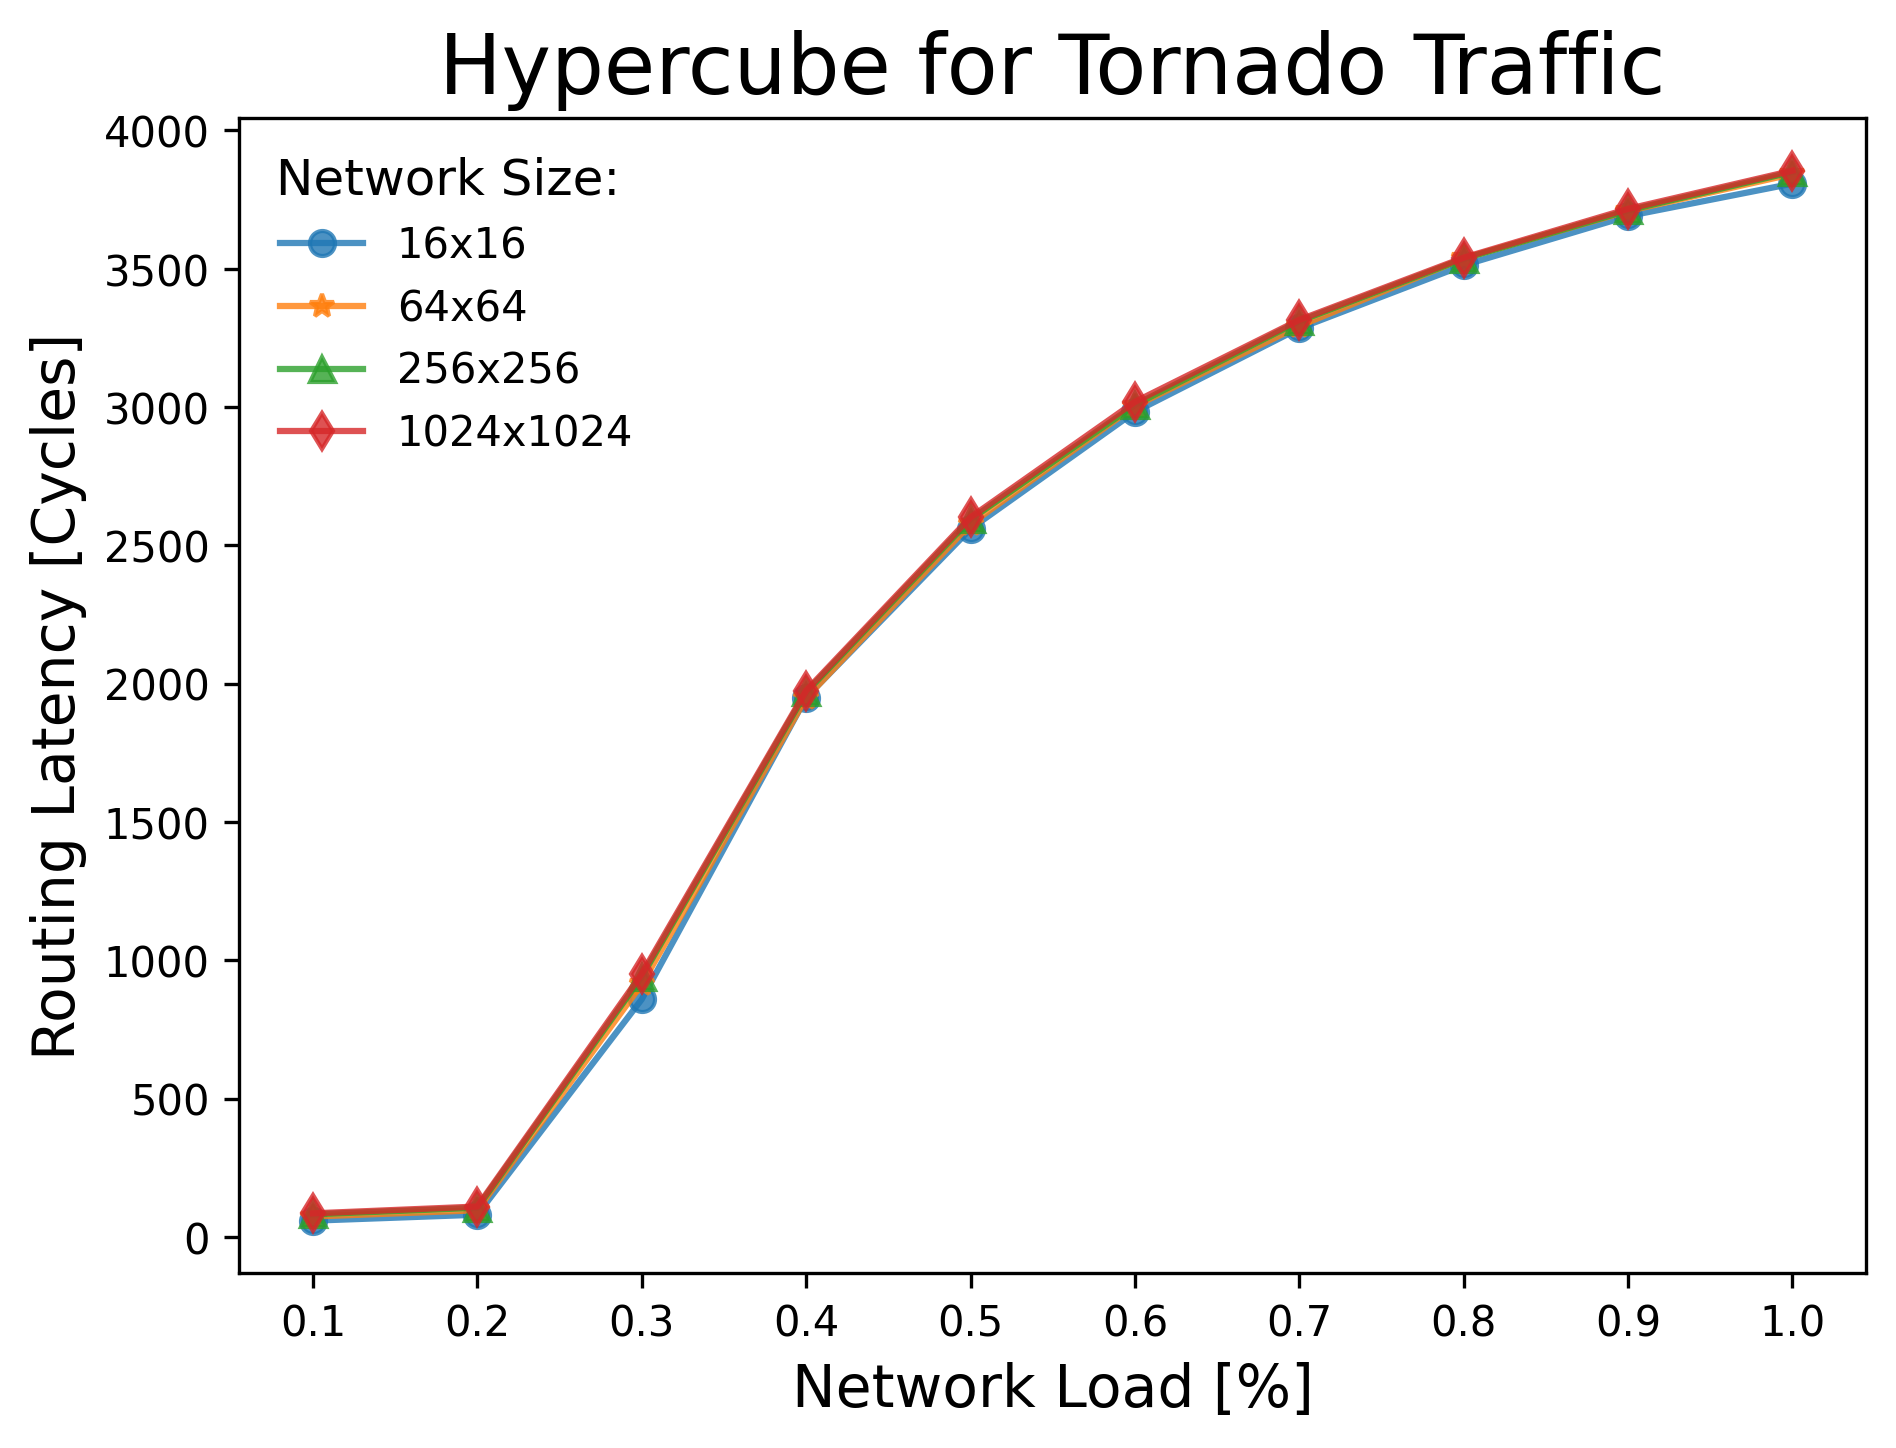

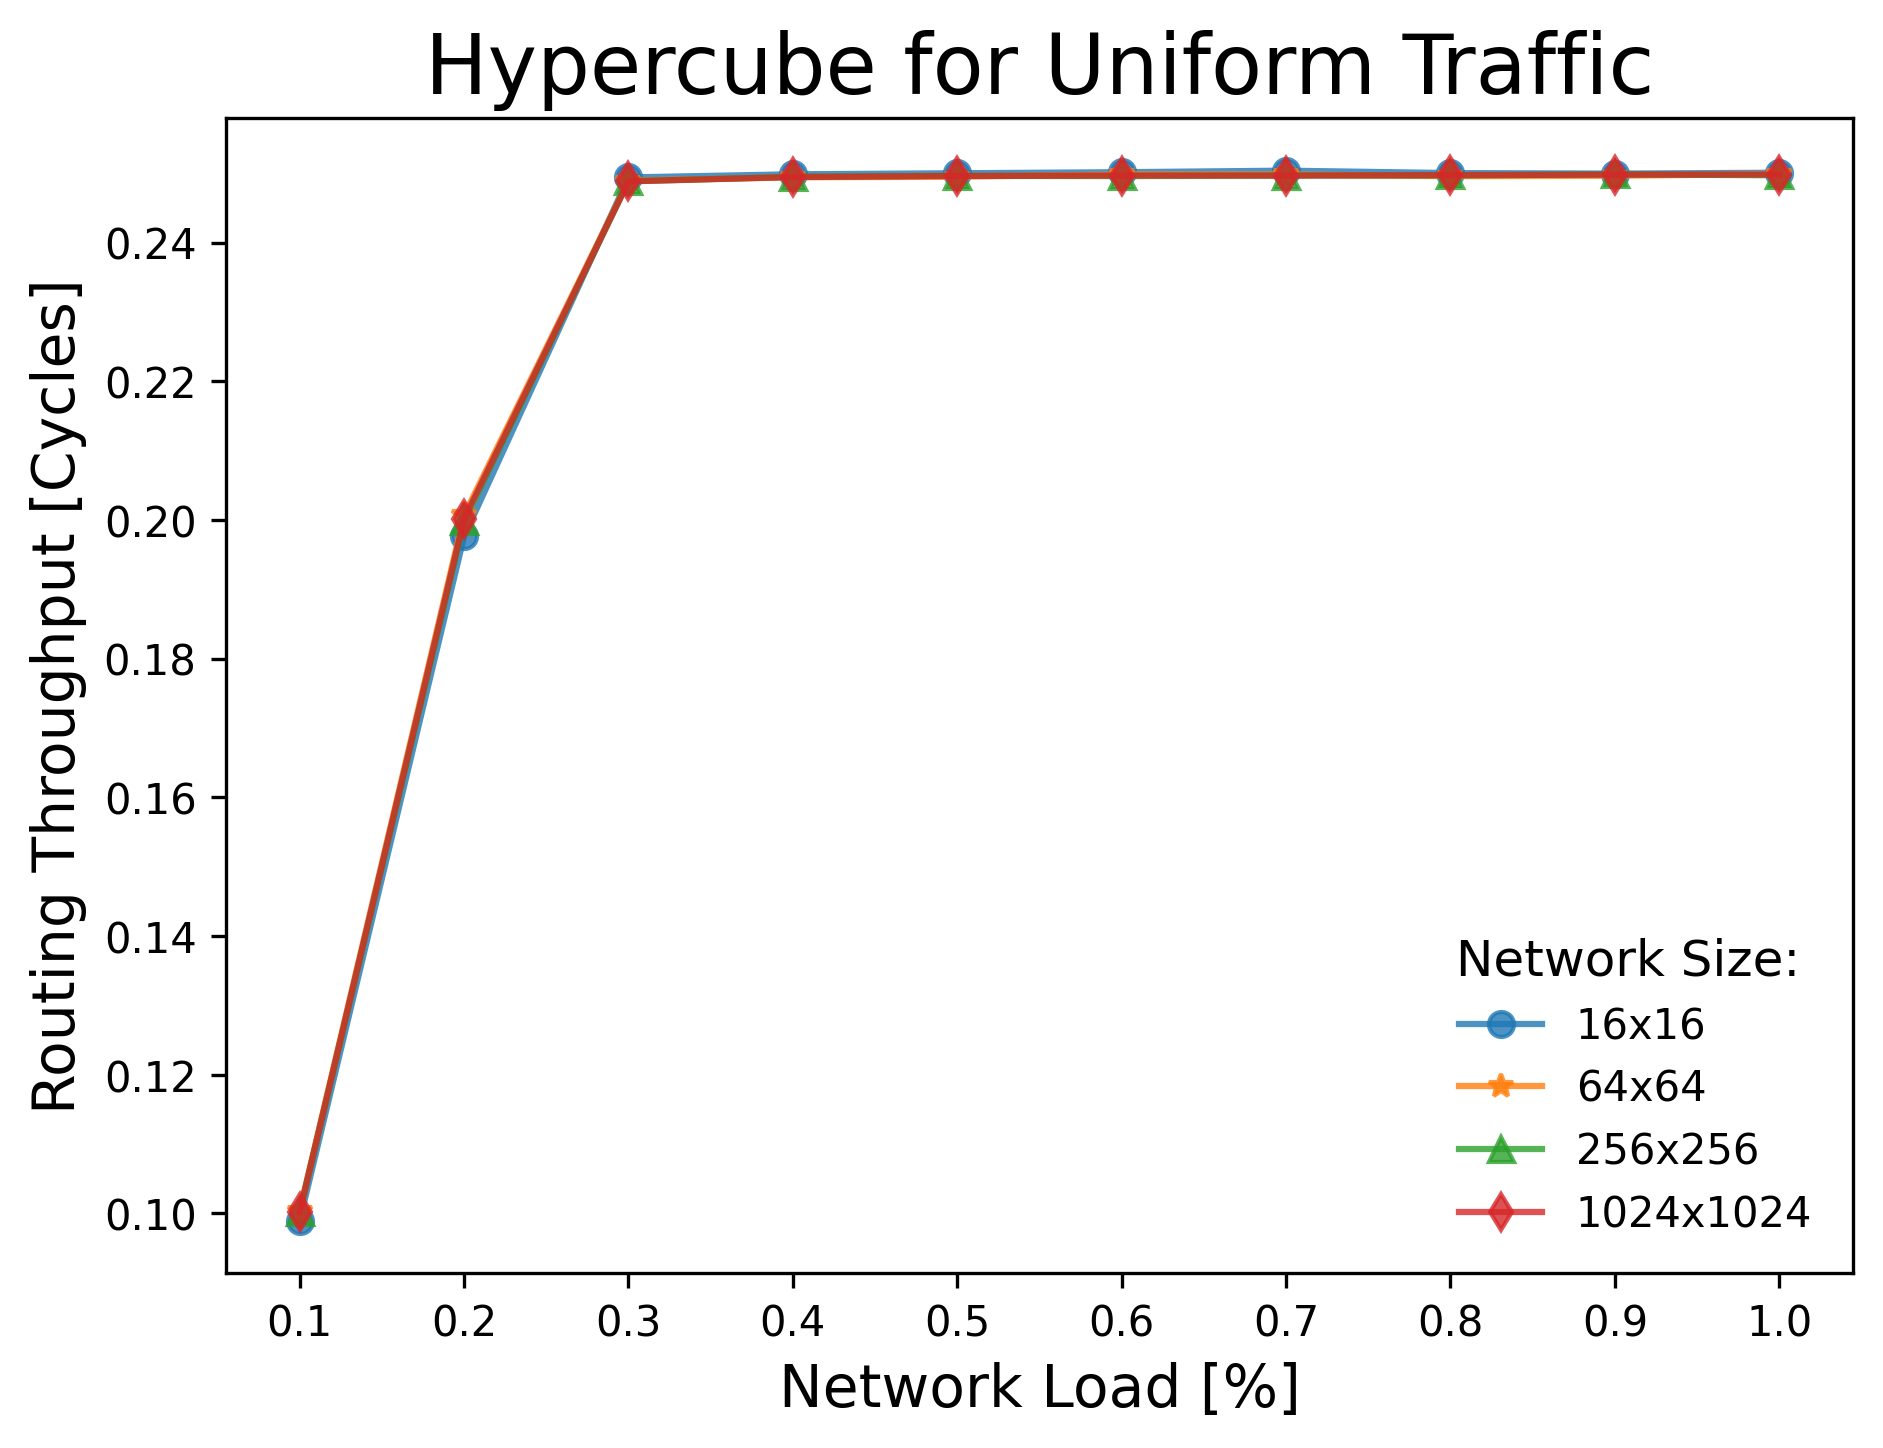

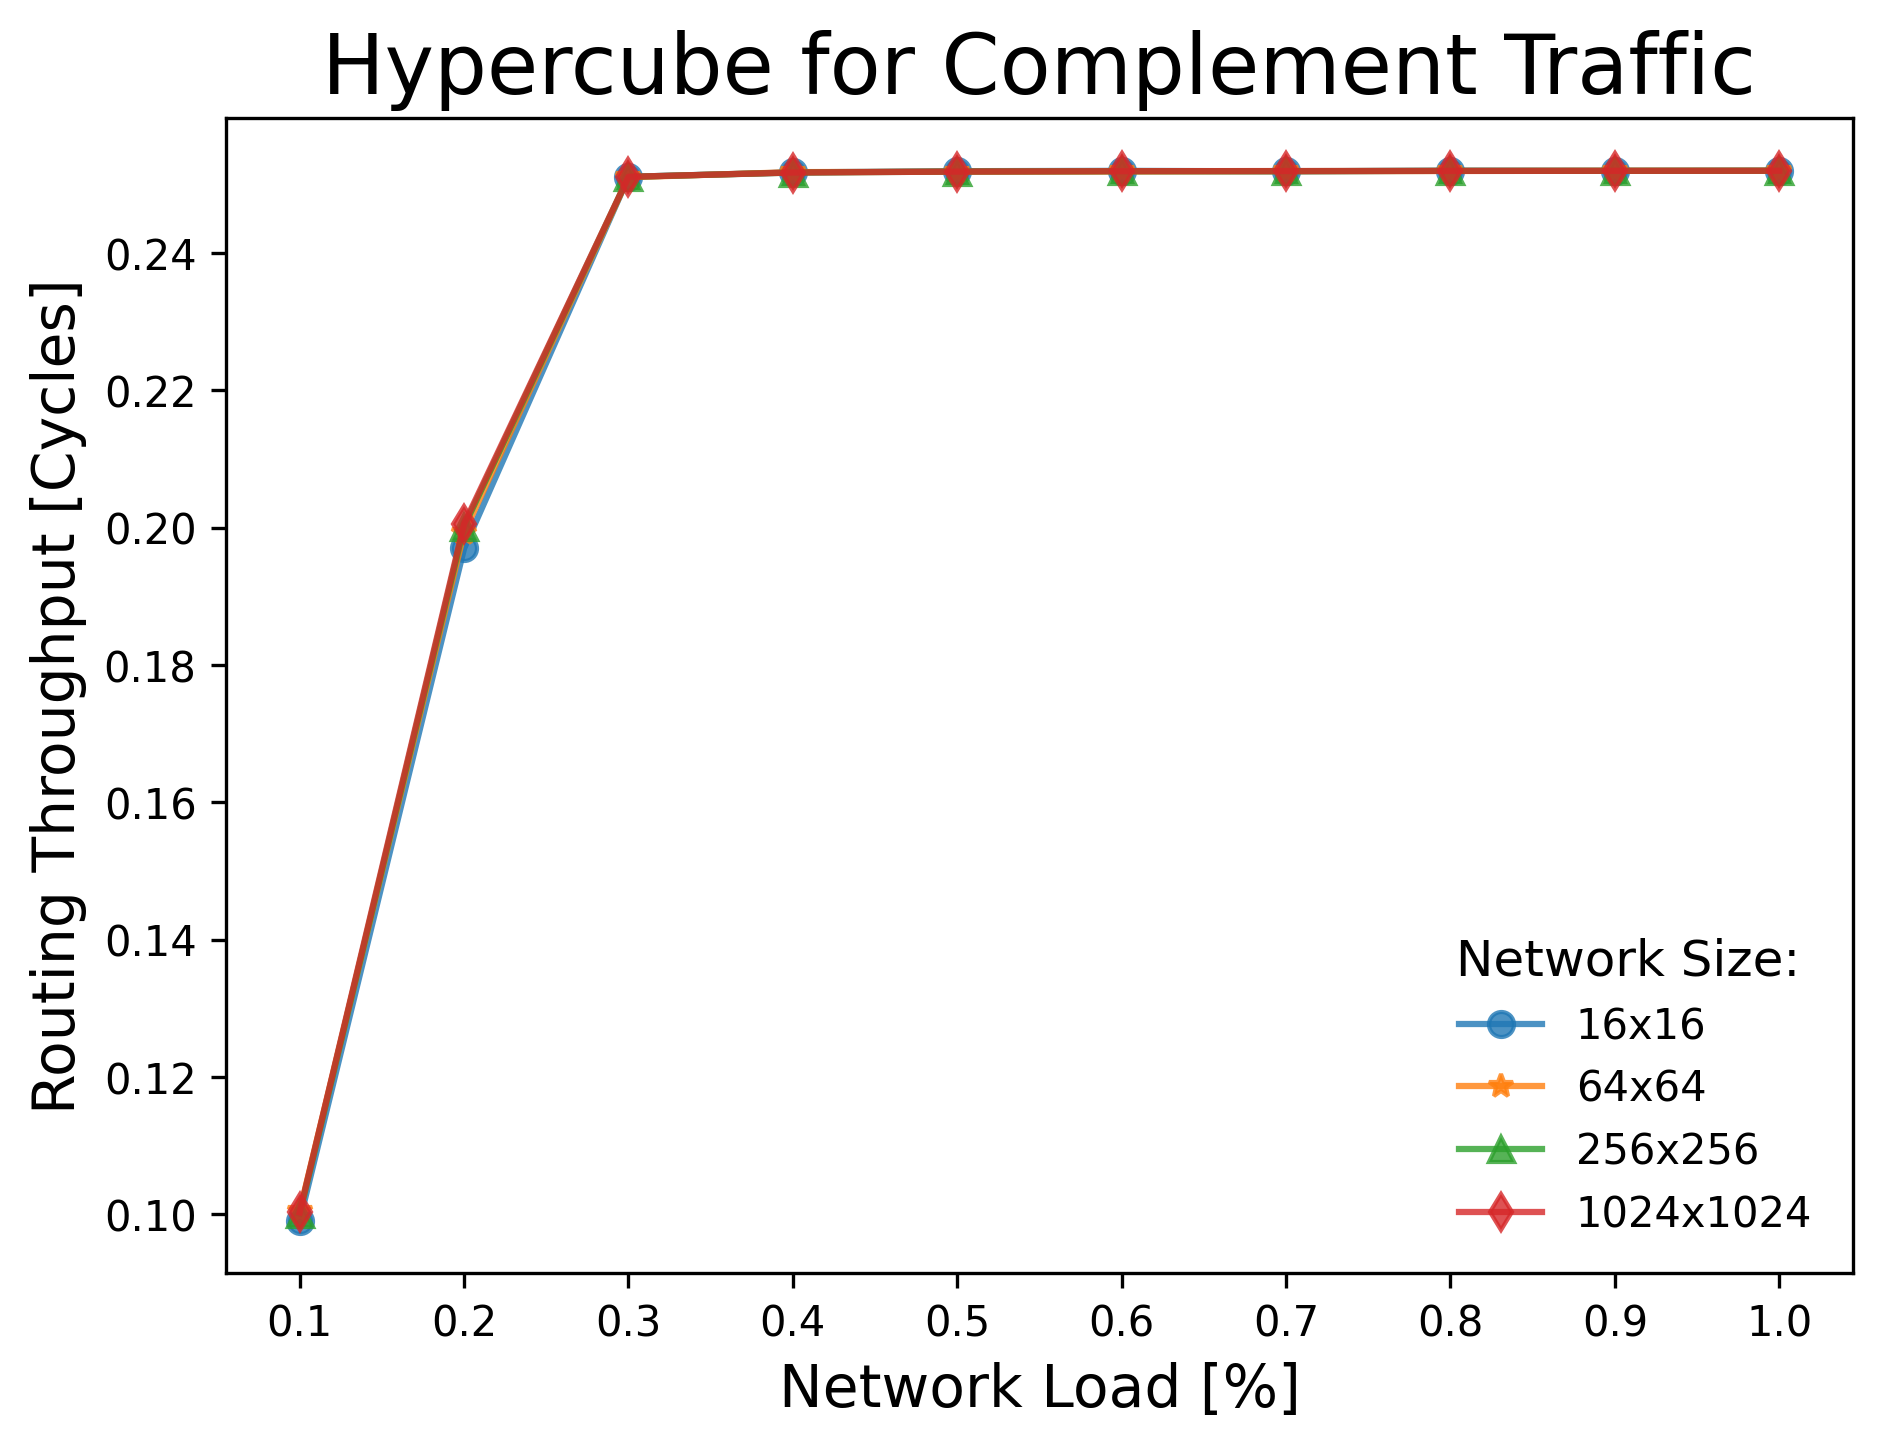

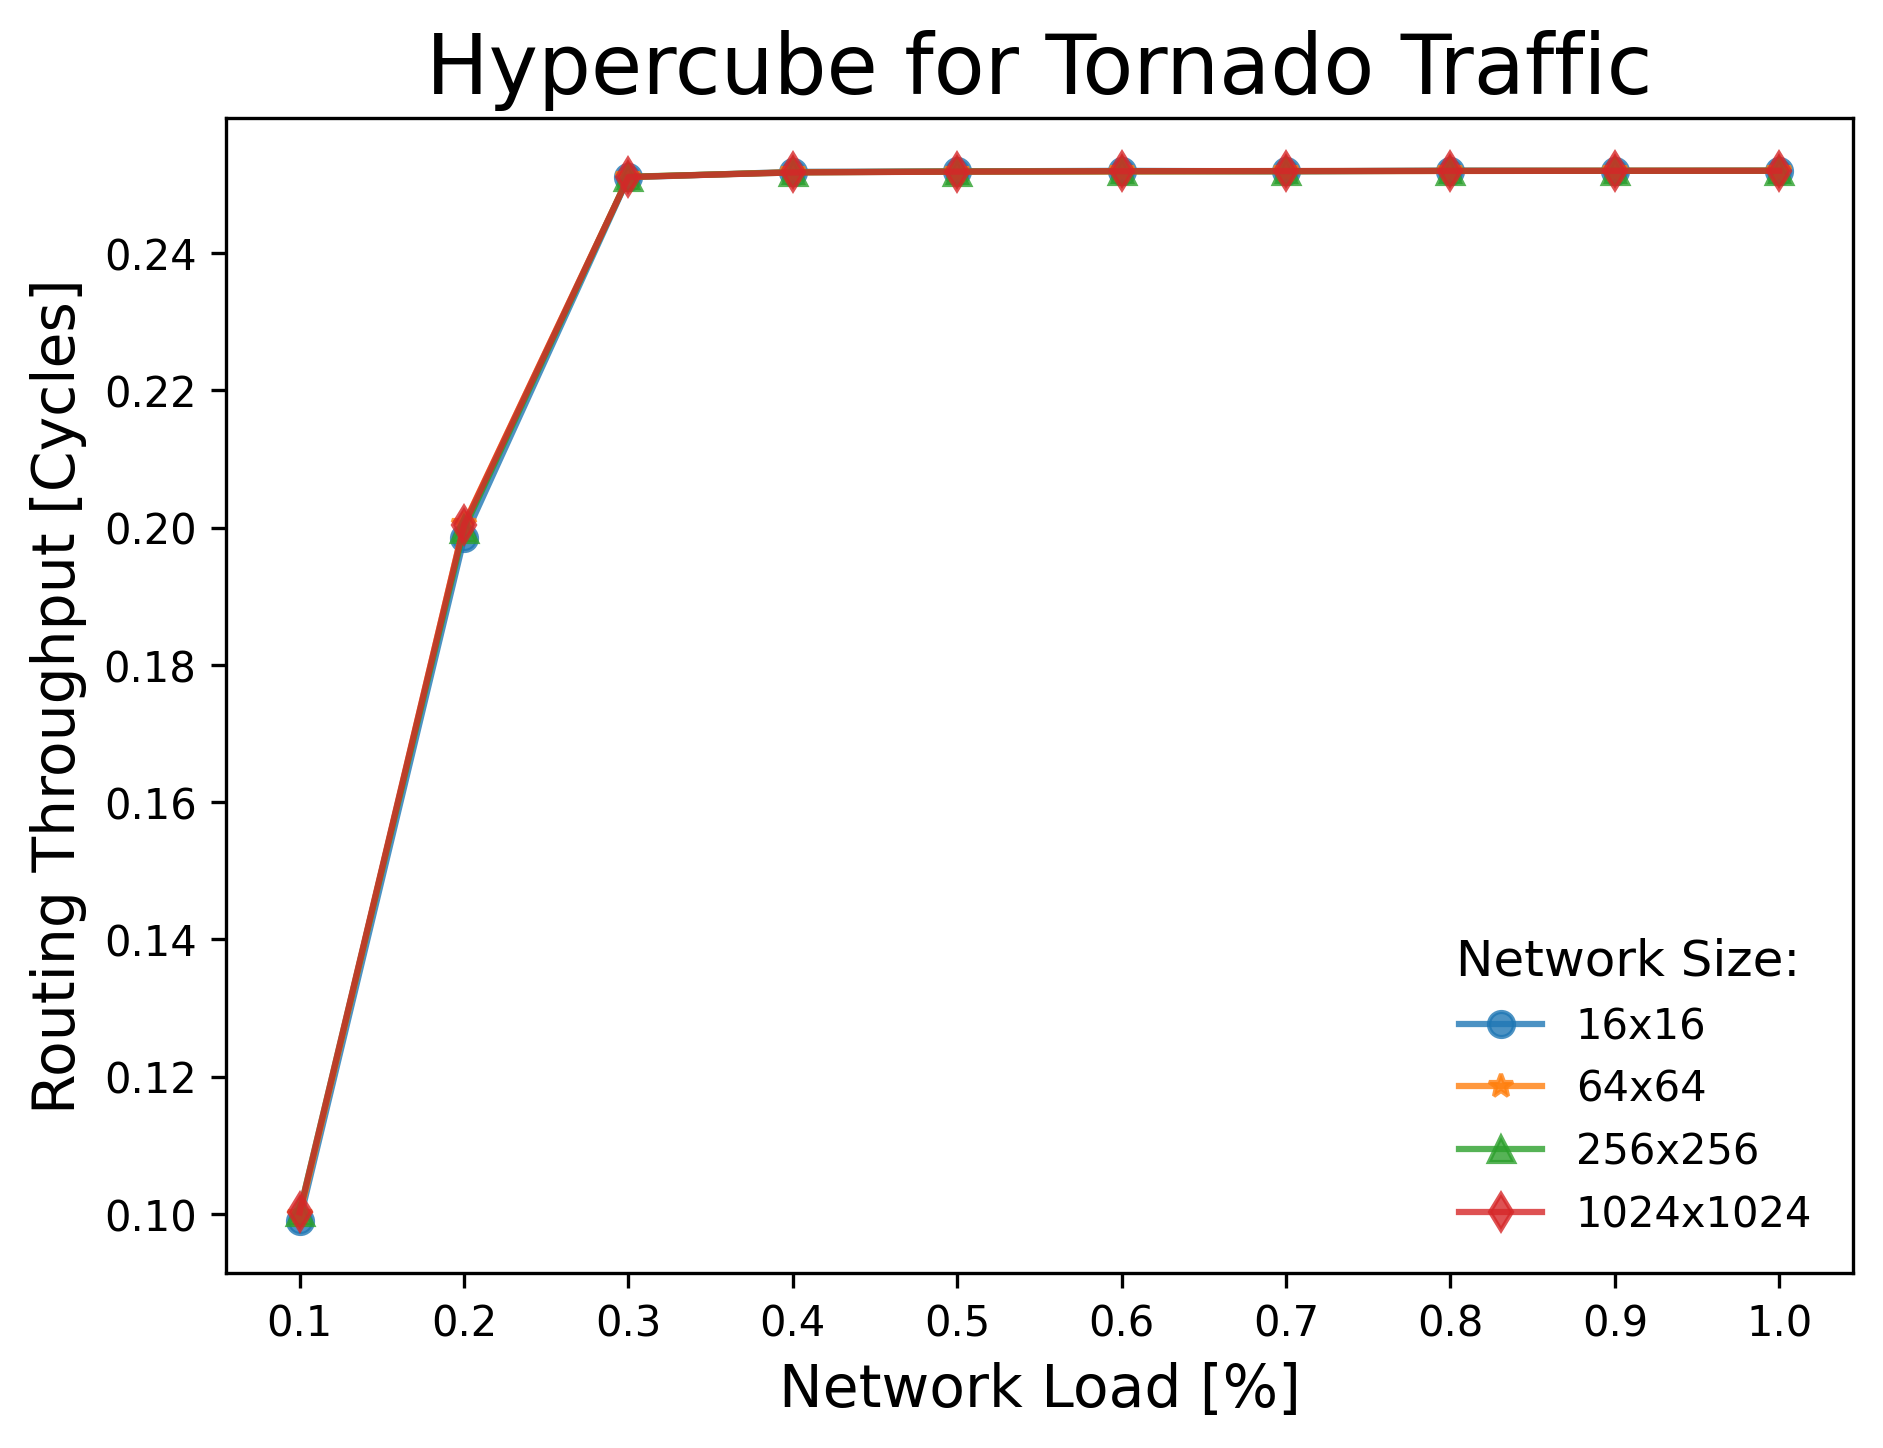

In [81]:
for traffic in [0, 4, 8]:
    traffic_i = np.where(traffic_args == traffic)[0][0]

    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=300)
    ax.set_title(f"Hypercube for {traffic_labels[traffic_i]} Traffic", fontsize=20)
    for i, K in enumerate(K_args):
        eval(f"ax.plot(load_args, hypercube_{K}x{K}_latency_{traffic}   , label=\"{K}x{K}\", marker=\"{markers[i]}\", alpha=0.8)")
        # eval(f"ax.plot(load_args, hypercube_{K}x{K}_throughput_{traffic}, )")

    ax.set_xticks(load_args)
    ax.set_xlabel("Network Load [%]", fontsize=14)

    ax.set_ylabel("Routing Latency [Cycles]", fontsize=14)

    plt.legend(title="Network Size: ", framealpha=0, fontsize=10, title_fontsize=12)
    plt.savefig(f"./plots/Hypercube_{traffic_labels[traffic_i]}_latency.png")
    plt.show()

for traffic in [0, 4, 8]:
    traffic_i = np.where(traffic_args == traffic)[0][0]

    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=300)
    ax.set_title(f"Hypercube for {traffic_labels[traffic_i]} Traffic", fontsize=20)
    for i, K in enumerate(K_args):
        eval(f"ax.plot(load_args, hypercube_{K}x{K}_throughput_{traffic}   , label=\"{K}x{K}\", marker=\"{markers[i]}\", alpha=0.8)")

    ax.set_xticks(load_args)
    ax.set_xlabel("Network Load [%]", fontsize=14)

    ax.set_ylabel("Routing Throughput [Cycles]", fontsize=14)

    plt.legend(title="Network Size: ", framealpha=0, fontsize=10, title_fontsize=12)
    plt.savefig(f"./plots/Hypercube_{traffic_labels[traffic_i]}_throughput.png")
    plt.show()

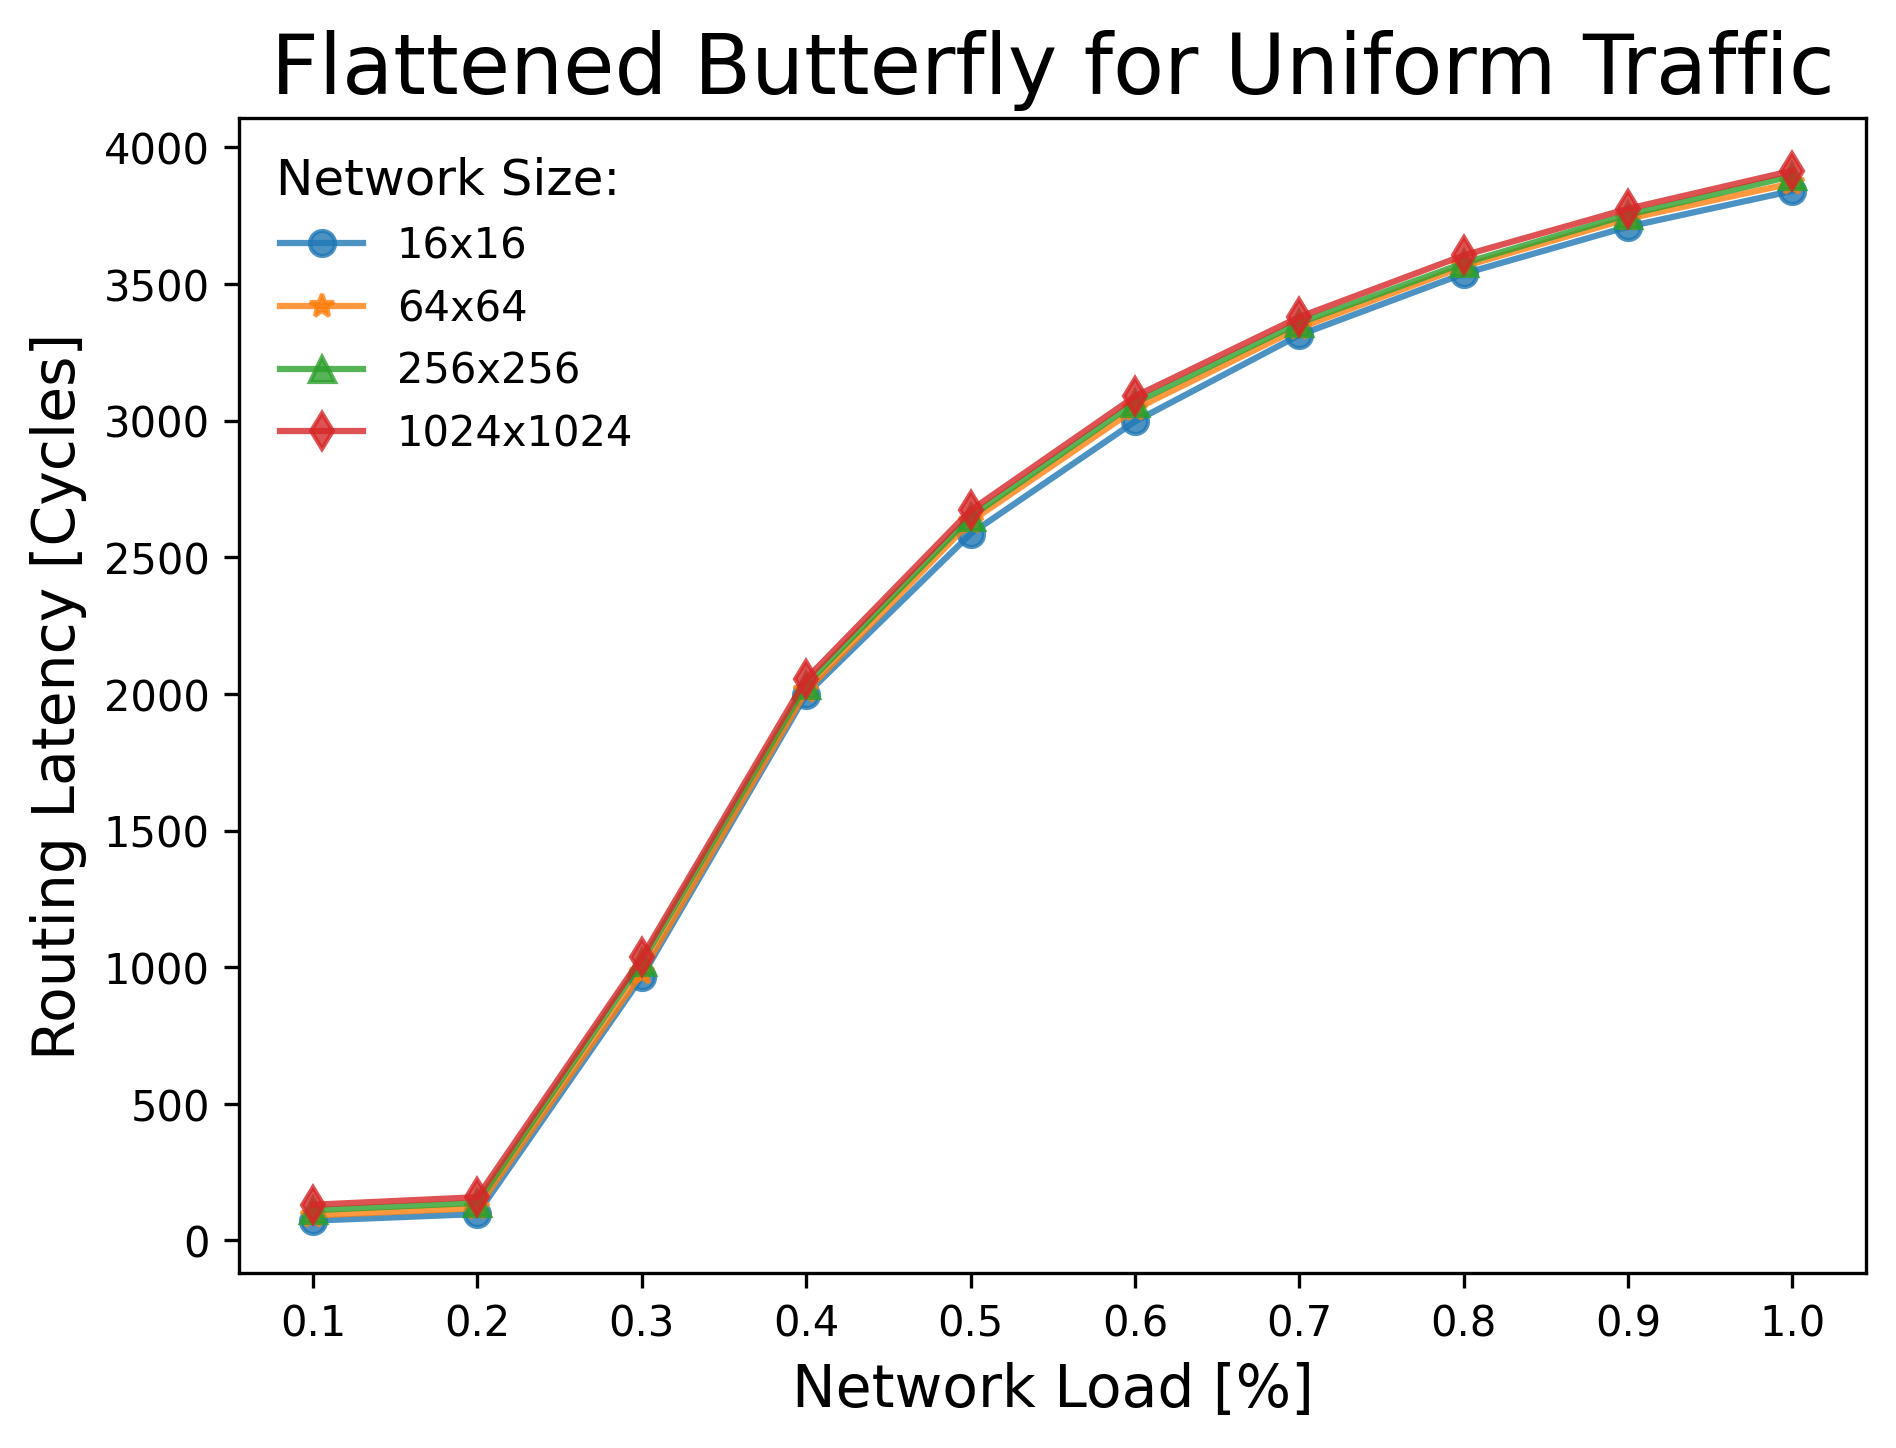

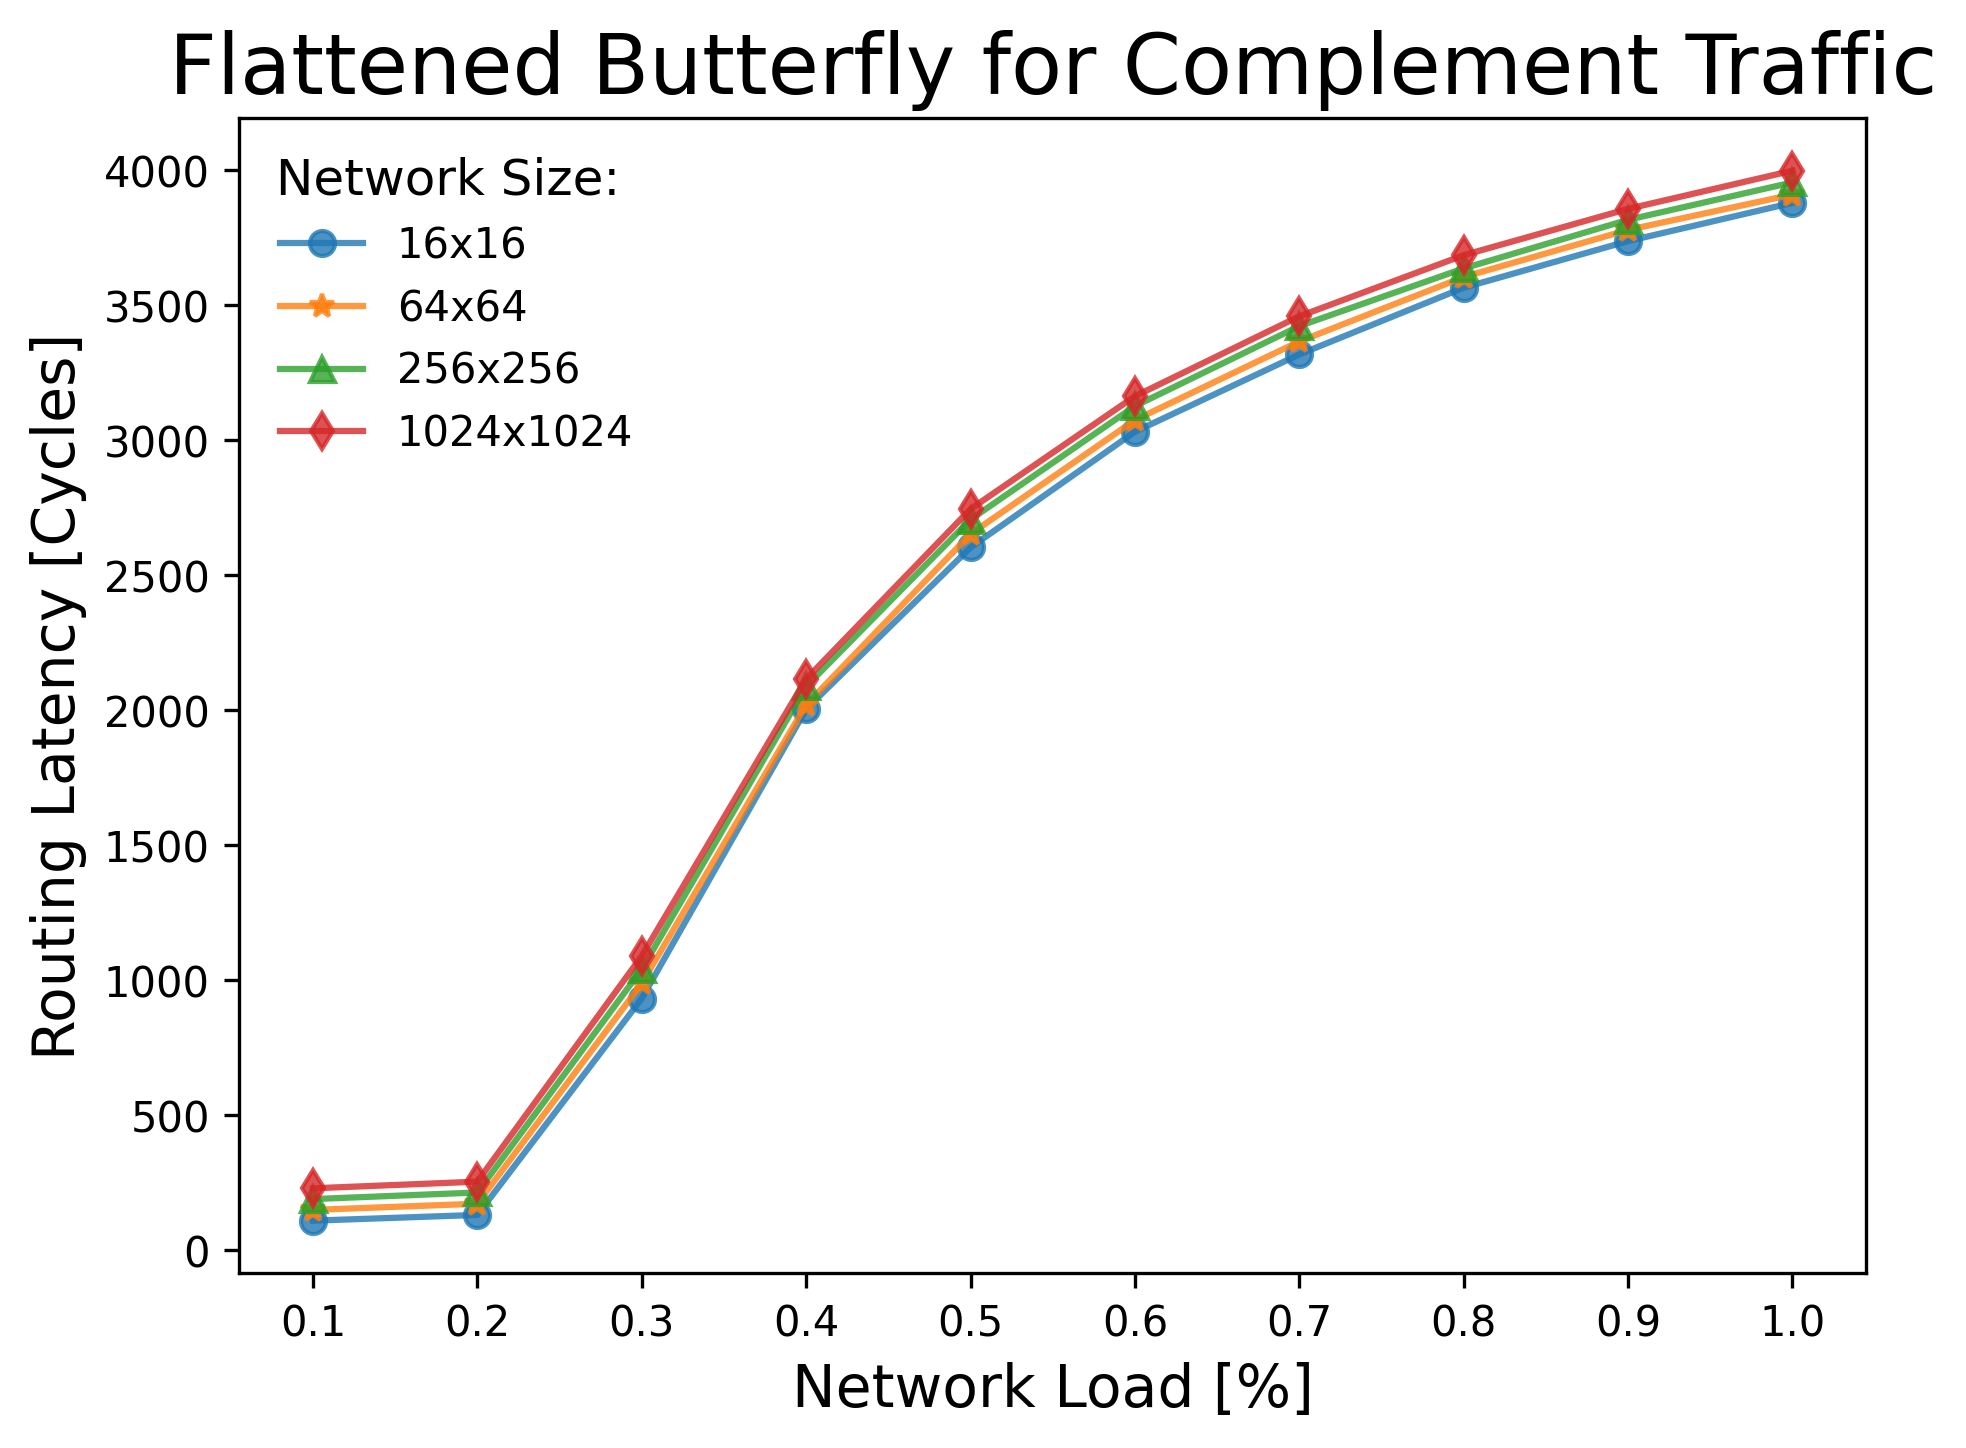

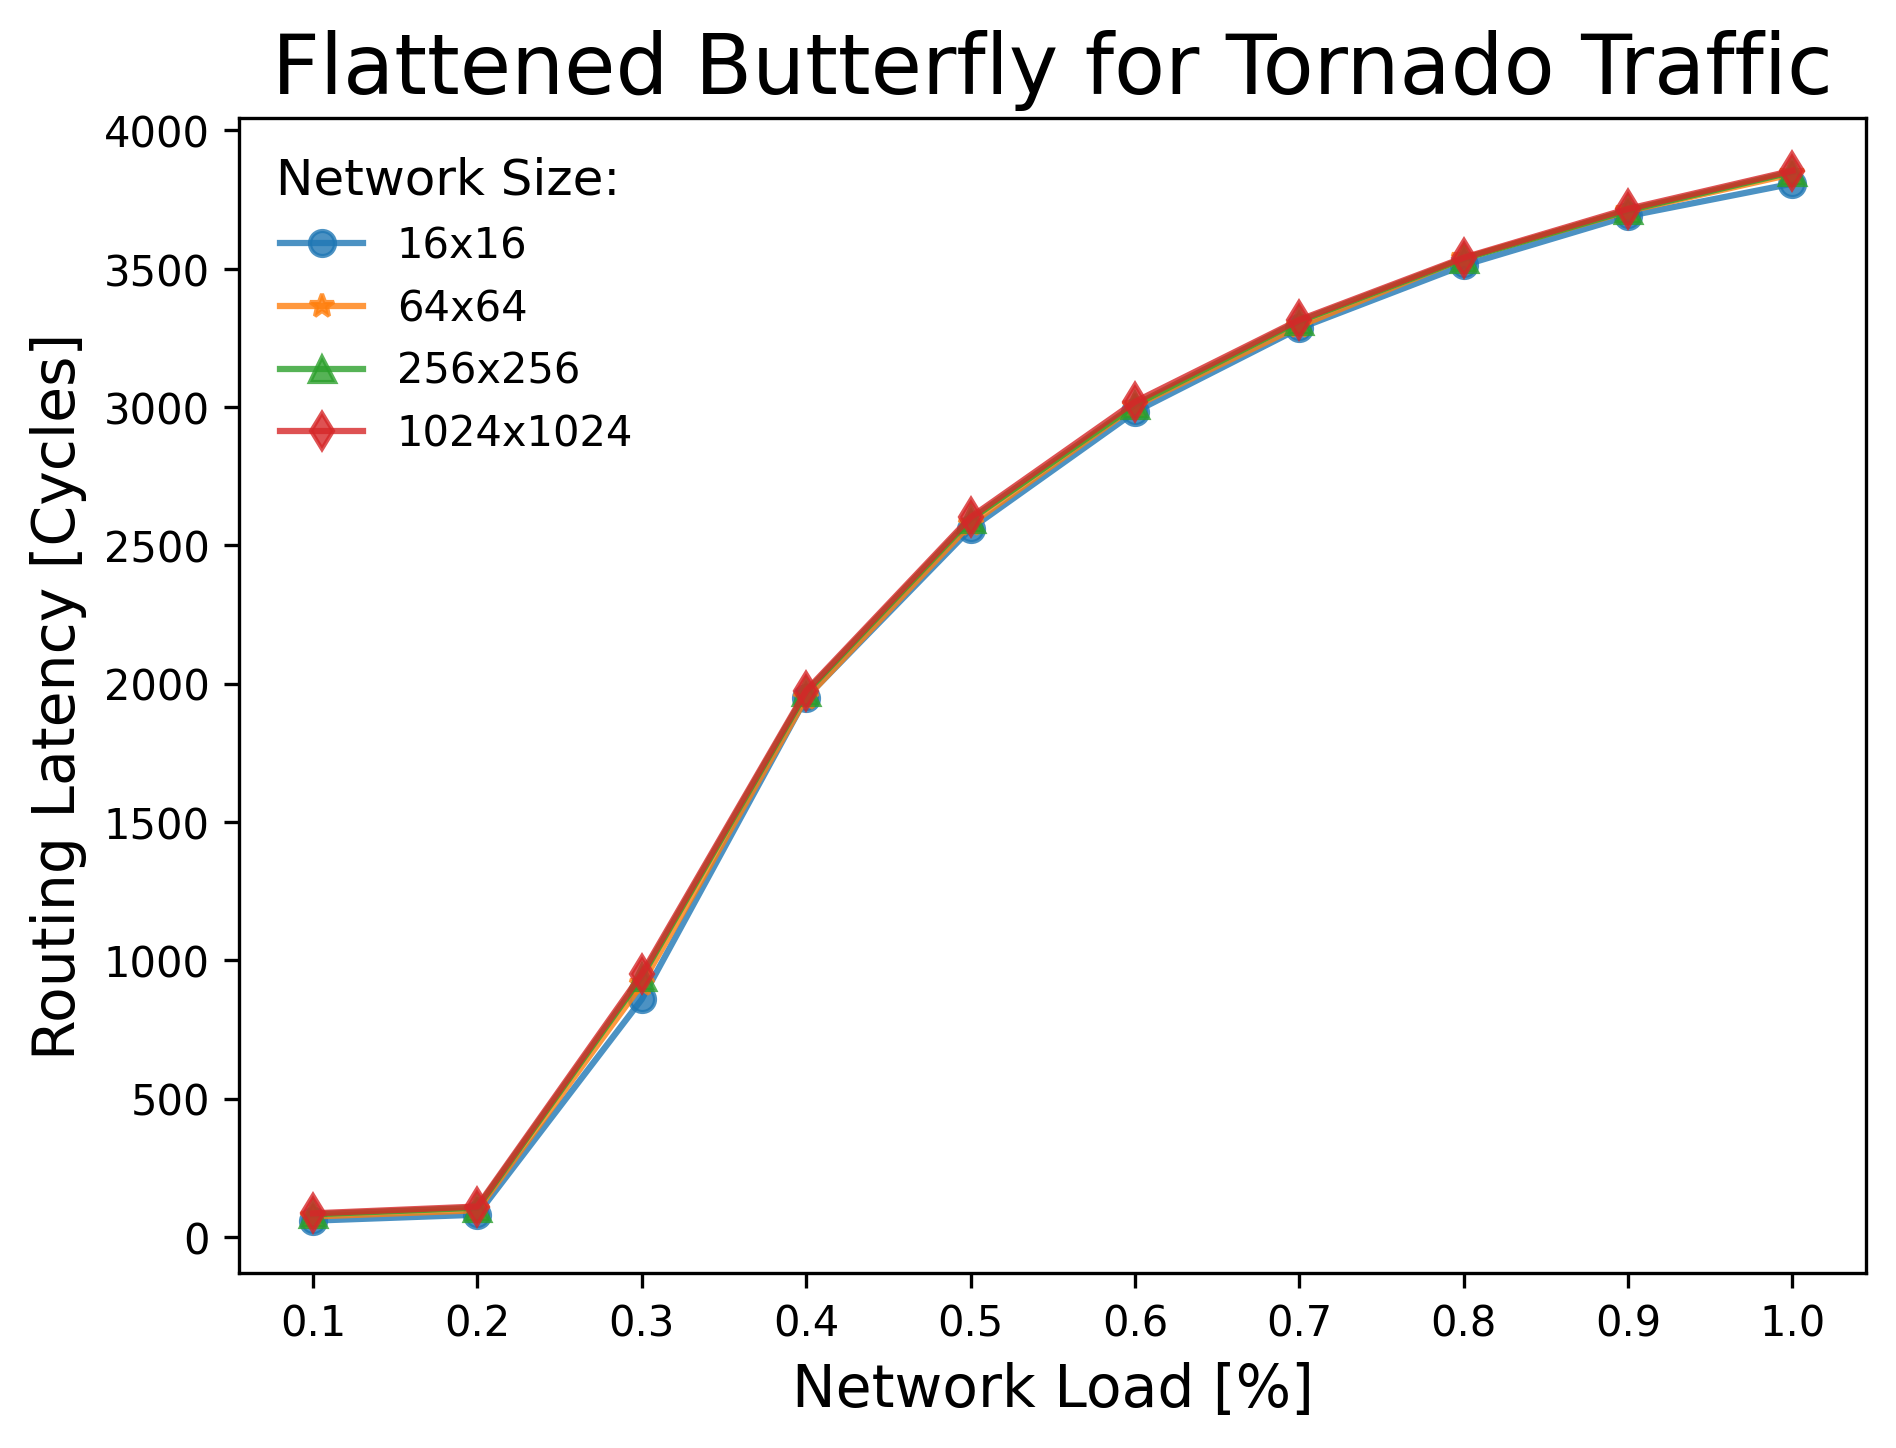

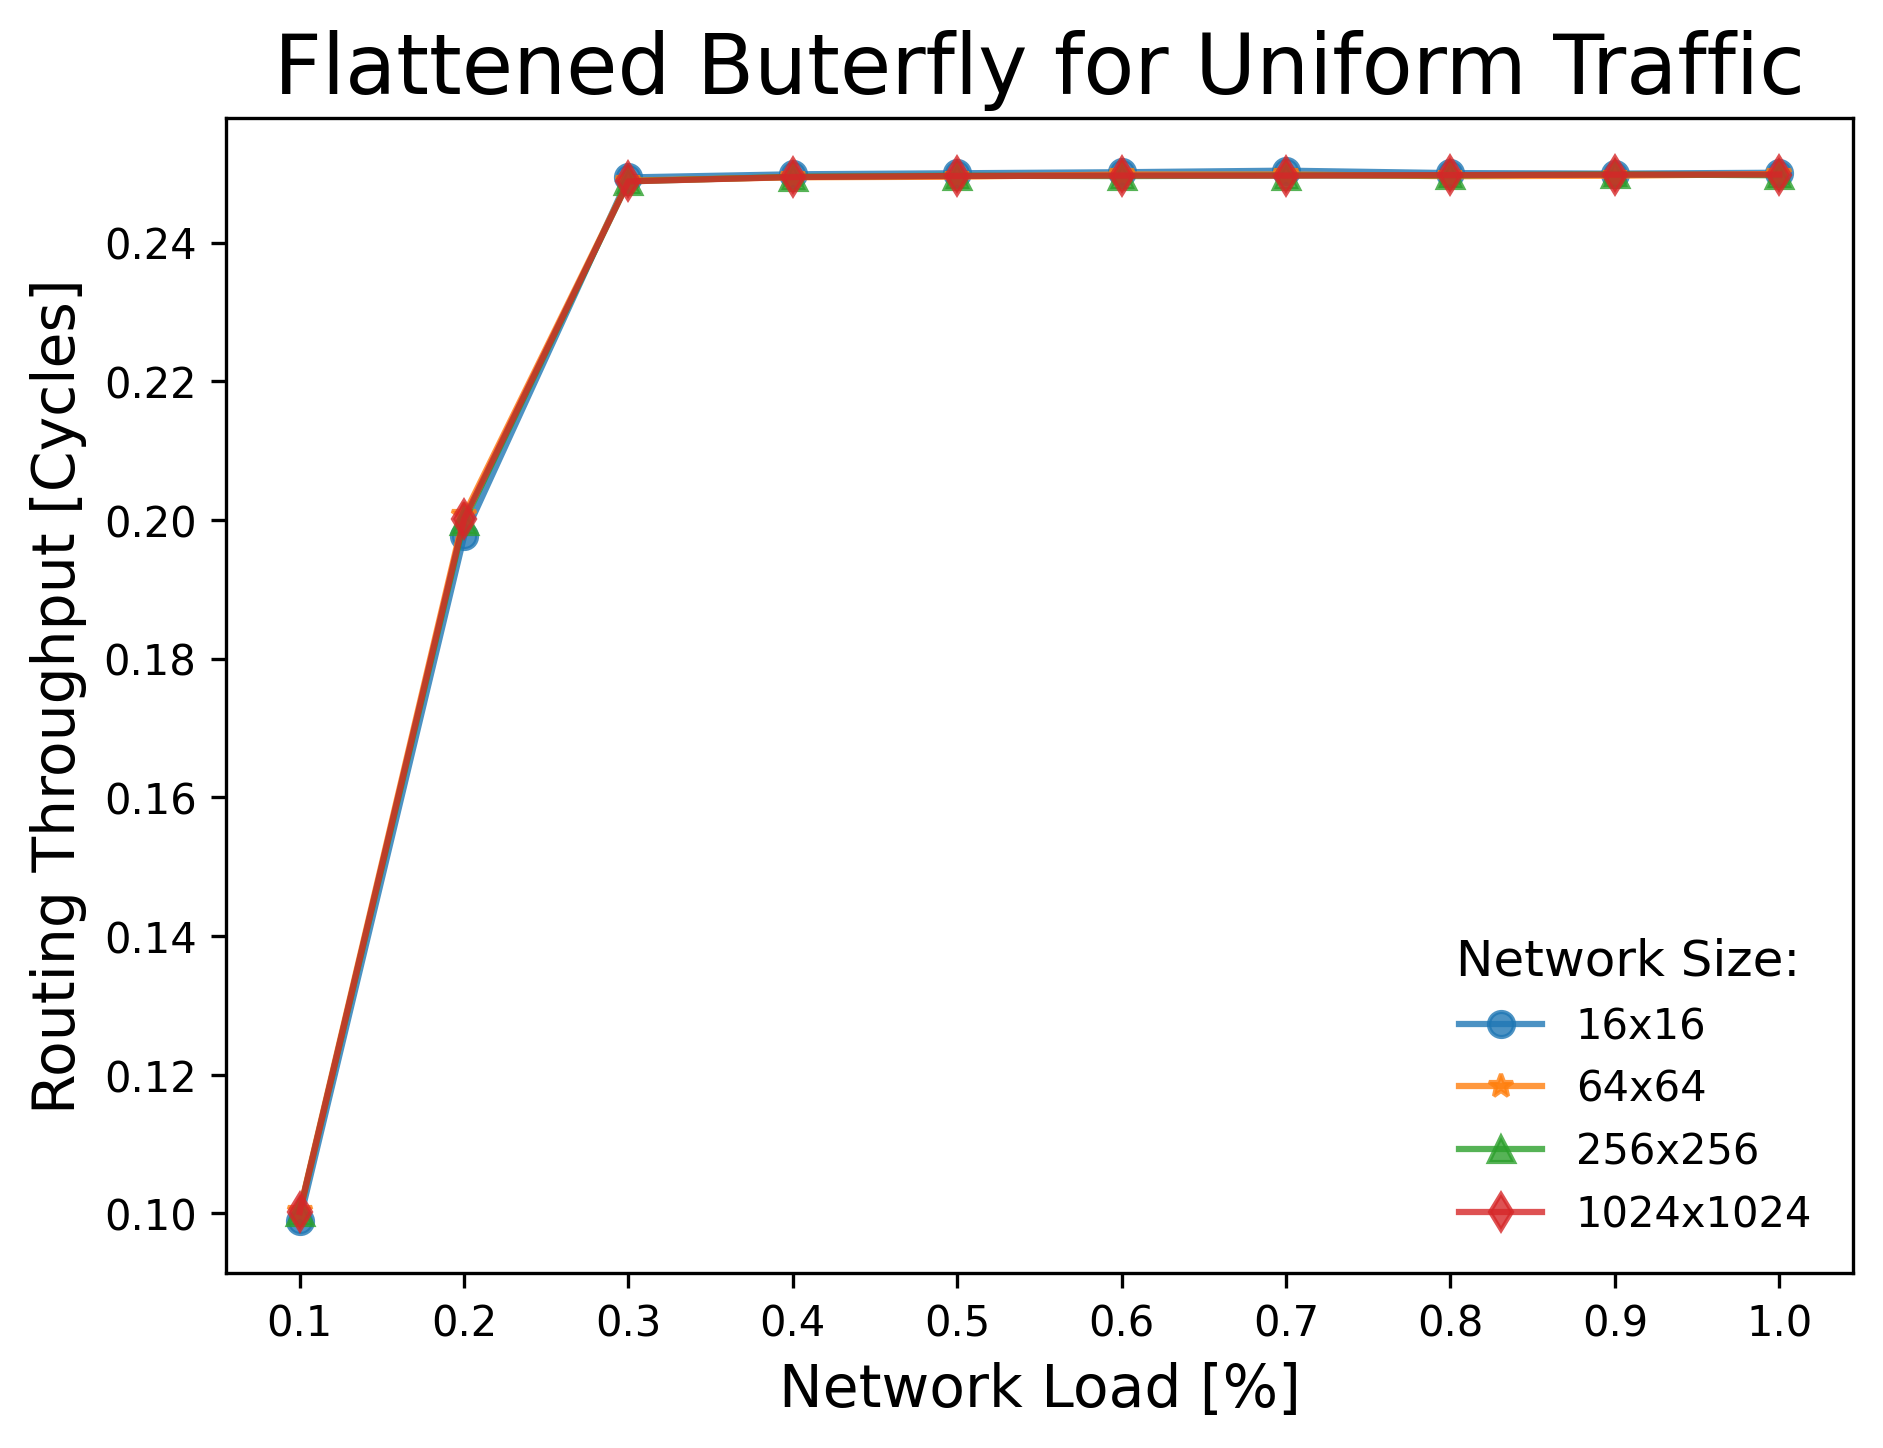

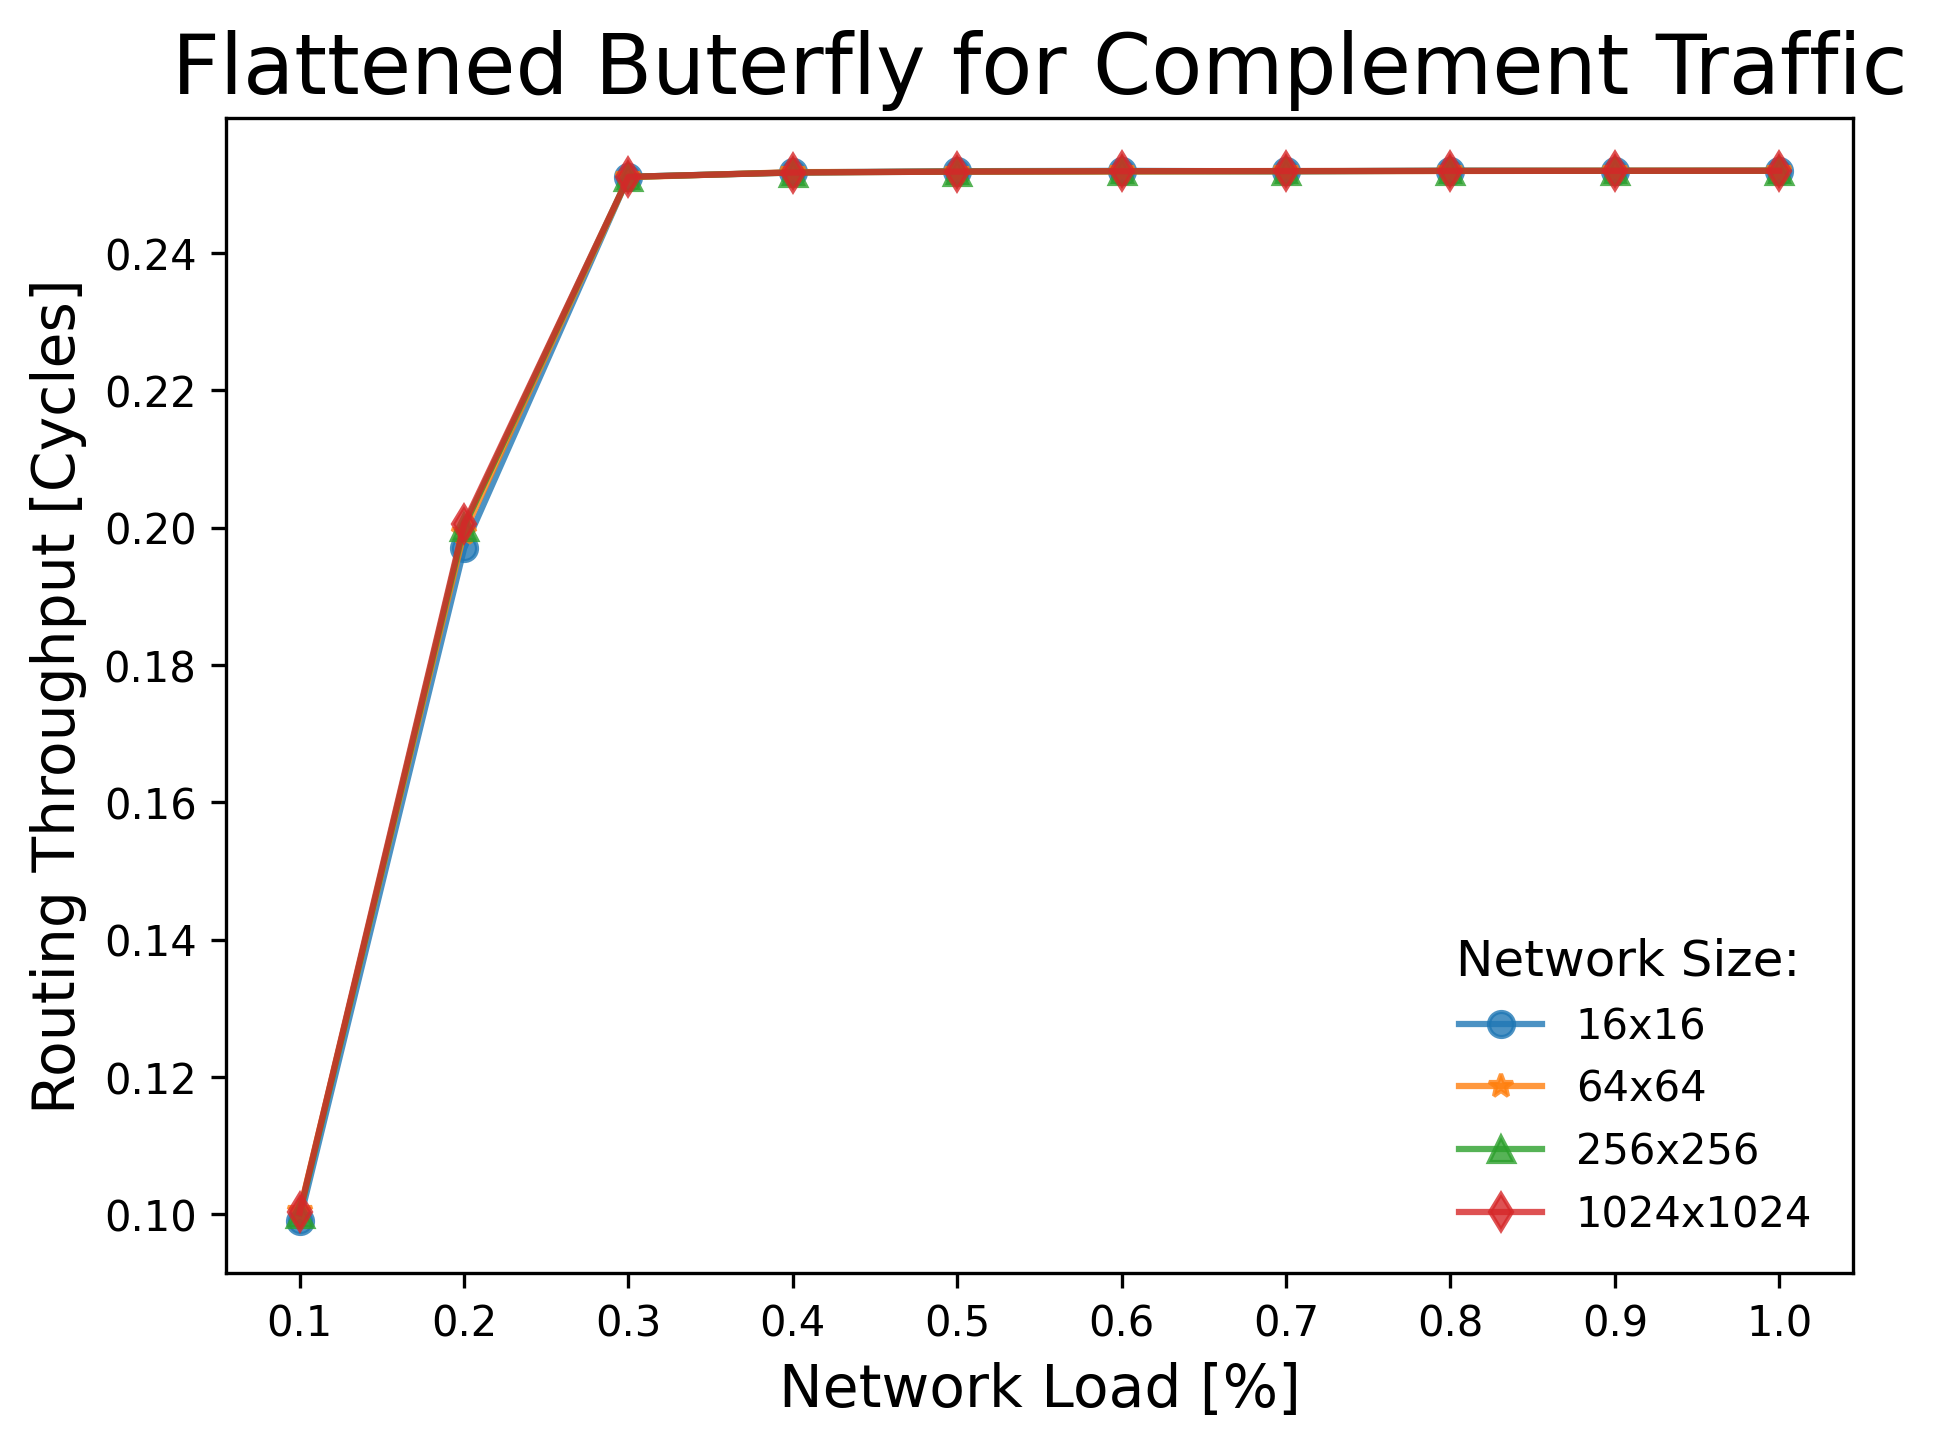

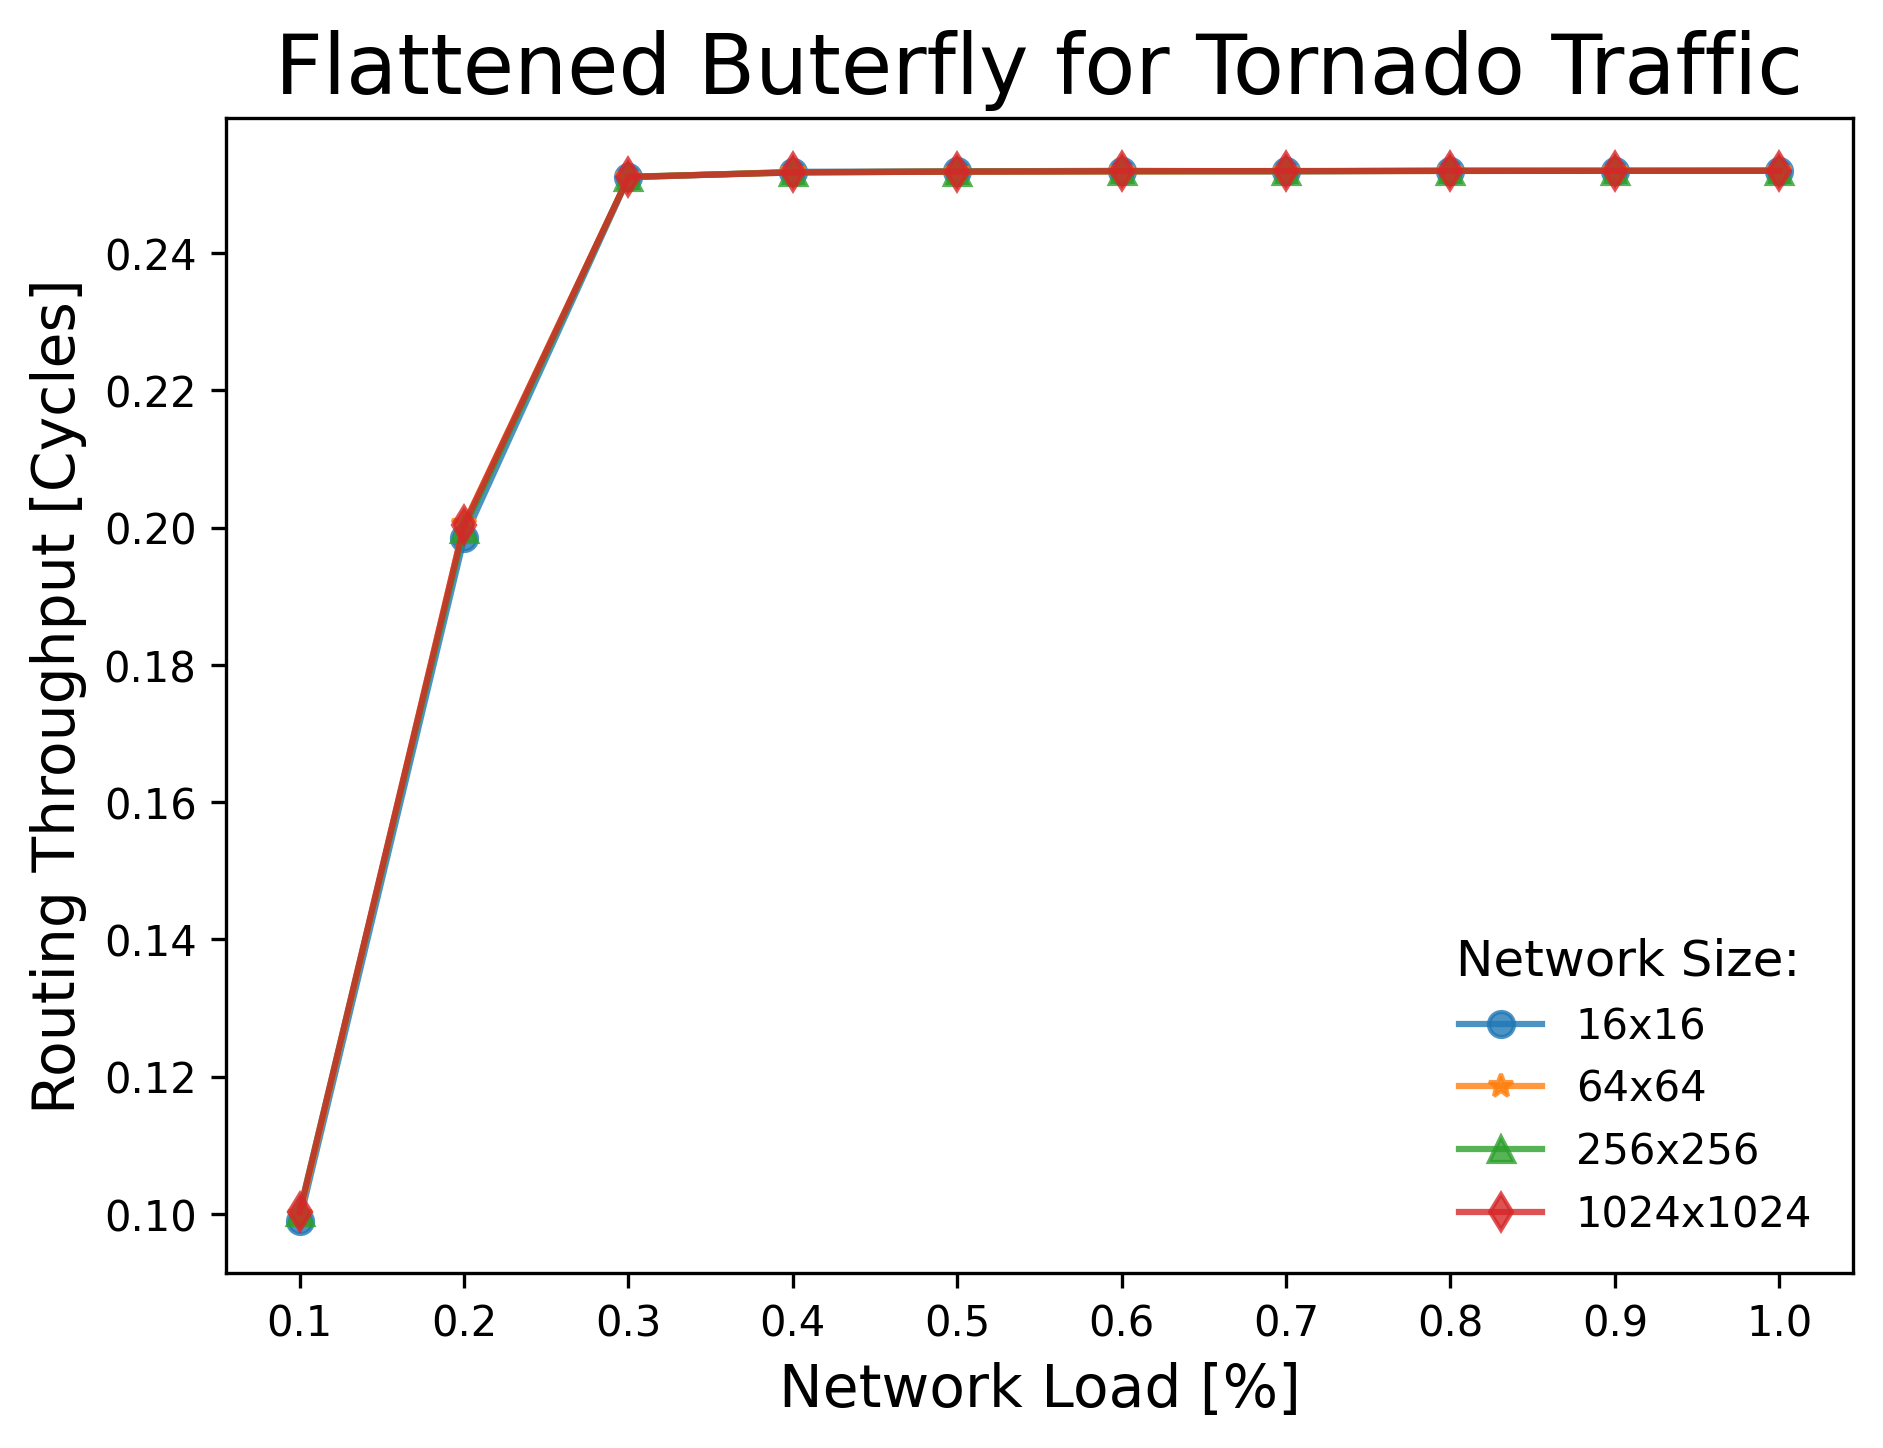

In [82]:
for traffic in [0, 4, 8]:
    traffic_i = np.where(traffic_args == traffic)[0][0]

    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=300)
    ax.set_title(f"Flattened Butterfly for {traffic_labels[traffic_i]} Traffic", fontsize=20)
    for i, K in enumerate(K_args):
        eval(f"ax.plot(load_args, flattened_butterfly_{K}x{K}_latency_{traffic}   , label=\"{K}x{K}\", marker=\"{markers[i]}\", alpha=0.8)")
        # eval(f"ax.plot(load_args, hypercube_{K}x{K}_throughput_{traffic}, )")

    ax.set_xticks(load_args)
    ax.set_xlabel("Network Load [%]", fontsize=14)

    ax.set_ylabel("Routing Latency [Cycles]", fontsize=14)

    plt.legend(title="Network Size: ", framealpha=0, fontsize=10, title_fontsize=12)
    plt.savefig(f"./plots/Flattened_butterfly_{traffic_labels[traffic_i]}_latency.png")
    plt.show()

for traffic in [0, 4, 8]:
    traffic_i = np.where(traffic_args == traffic)[0][0]

    fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=300)
    ax.set_title(f"Flattened Buterfly for {traffic_labels[traffic_i]} Traffic", fontsize=20)
    for i, K in enumerate(K_args):
        eval(f"ax.plot(load_args, flattened_butterfly_{K}x{K}_throughput_{traffic}   , label=\"{K}x{K}\", marker=\"{markers[i]}\", alpha=0.8)")

    ax.set_xticks(load_args)
    ax.set_xlabel("Network Load [%]", fontsize=14)

    ax.set_ylabel("Routing Throughput [Cycles]", fontsize=14)

    plt.legend(title="Network Size: ", framealpha=0, fontsize=10, title_fontsize=12)
    plt.savefig(f"./plots/Flattened_butterfly_{traffic_labels[traffic_i]}_throughput.png")
    plt.show()